### 목표
- 손글씨 숫자(0~9)를 분류하는 모델을 만들어보자.
- 이미지 데이터의 형태를 이해해보자.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/digit_train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
img0 = data.iloc[0, 1:]

In [5]:
print(img0.max())
print(img0.min())

255
0


In [6]:
28*28

784

In [7]:
img0.values.reshape(-1,28) # reshape(28,-1) # reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

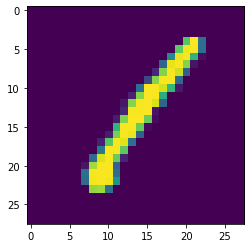

In [8]:
plt.imshow(img0.values.reshape(-1,28)) 
plt.show()

#### 5000장만 추출하여 활용

In [9]:
X = data.iloc[:5000, 1:]
y = data.iloc[:5000,0]

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### 모델링
- KNN
- Decision tree
- Logistic regression
- Linear SVM

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [14]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logi = LogisticRegression()
svm = LinearSVC()

In [16]:
knn_reslt = cross_val_score(knn, X_train, y_train, cv = 5)
tree_reslt = cross_val_score(tree, X_train, y_train, cv = 5)
logi_reslt = cross_val_score(logi, X_train, y_train, cv = 5)
svm_reslt = cross_val_score(svm, X_train, y_train, cv = 5)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [17]:
print(' knn : ', knn_reslt.mean() )
print(' tree : ', tree_reslt.mean() )
print(' logi : ', logi_reslt.mean() )
print(' svm : ', svm_reslt.mean() )

 knn :  0.9148571428571428
 tree :  0.7517142857142857
 logi :  0.8808571428571428
 svm :  0.8222857142857144


In [18]:
knn.fit(X_train,y_train)
tree.fit(X_train,y_train)
logi.fit(X_train,y_train)
svm.fit(X_train,y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [19]:
print('knn : ', knn.score(X_test, y_test))
print('tree : ', tree.score(X_test, y_test))
print('logi : ', tree.score(X_test, y_test))
print('svm : ', svm.score(X_test, y_test))

knn :  0.914
tree :  0.7506666666666667
logi :  0.7506666666666667
svm :  0.8073333333333333


In [20]:
knn.predict([X_test.iloc[0,:]])

array([8], dtype=int64)

In [21]:
y_test.iloc[0]

8